In [23]:
import fastai
from fastai.text.all import *
import os
from PIL import Image
from pathlib import Path
import numpy as np
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt
import pickle
from collections import Counter
from seaborn import barplot
import shutil

In [24]:
PRIMUS_DIR = Path('/home/macosta/ttmp/primus-data/primus-semantic/semantic-cleaned')
SEMANTIC_DIR = Path('/home/ibukey/ttmp/primus-semantic/')

In [25]:
# create txt files from agnostic
indir = PRIMUS_DIR
SEMANTIC_TXT_END = Path('/home/ibukey/ttmp/primus-semantic-txt-end/')

SEMANTIC_TXT_END.mkdir(exist_ok=True)

for file in tqdm(os.listdir(indir)):
    with open(indir/file,'r') as f:
        words = f.read().split()
    outfile = SEMANTIC_TXT_END / (file[:-9]+'.txt')
    with open(outfile,'w') as fout:
        word_lst = ["<start>"]
        word_lst.extend([word for word in words])
        word_lst.append("<end>")
        fout.writelines([word + ' ' for word in word_lst])

100%|███████████████████████████████████| 87678/87678 [00:09<00:00, 9582.31it/s]


In [26]:
len(os.listdir(SEMANTIC_TXT_END))

87679

In [27]:
SEMANTIC_TXT_END = Path('/home/ibukey/ttmp/primus-semantic-txt-end/')

In [28]:
whitespace_tokenizer = BaseTokenizer()

In [29]:
data_loader = TextDataLoaders.from_folder(
    path=SEMANTIC_TXT_END, 
    is_lm=True, valid_pct=0.1, 
    tok_tfm=whitespace_tokenizer)

Rules: []


In [30]:
len(data_loader.vocab)

400

In [31]:
learn = language_model_learner(
    data_loader, 
    AWD_LSTM, 
    metrics=[accuracy, Perplexity()], 
    path=str(SEMANTIC_TXT_END), 
    pretrained=False,
    wd=0.1).to_fp16()

SuggestedLRs(valley=0.0003311311302240938)

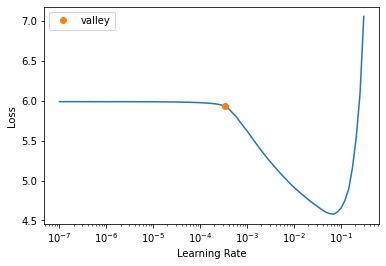

In [32]:
learn.lr_find()

In [33]:
lr = 3e-4

In [34]:
learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,1.674785,1.594017,0.514160,4.923489,02:26


In [35]:
learn.unfreeze()
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,1.557555,1.506489,0.533275,4.510867,02:28
1,1.356158,1.271829,0.593551,3.567372,02:19
2,1.122602,1.081846,0.622145,2.950120,02:16
3,1.054501,1.012291,0.644322,2.751899,02:25
4,1.018776,0.977713,0.659421,2.658370,02:27
5,0.981131,0.952669,0.669326,2.592621,02:24
6,0.968357,0.936318,0.675547,2.550574,02:19
7,0.956751,0.926599,0.679070,2.525904,02:16
8,0.953098,0.922181,0.680621,2.514769,02:20
9,0.956091,0.921476,0.680880,2.512997,02:16


In [36]:
learn.save('semantic-model')

Path('/home/ibukey/ttmp/primus-semantic-txt-end/models/semantic-model.pth')

In [88]:
SEED = '<start> clef-F4 keySignature-GM timeSignature-3/4'

In [90]:
learn.predict(SEED, 60, temperature=.8, no_unk=True)

'<start> clef-F4 keySignature-GM timeSignature-3/4 note G3 quarter note A3 quarter note B3 quarter barline note B3 quarter tie note A3 eighth note G3 eighth note G3 quarter barline note G3 quarter note F#3 quarter note G3 quarter barline note F#3 half rest quarter barline <end>  <start> clef-G2 timeSignature-C note C5 whole tie barline note C5 quarter rest quarter rest half barline note C5'

## Semantic to PAE

In [93]:
# Remove <start>, <end> before conversion

#keySignature-BbM
# make string without start/end tokens
pred = "clef-F4 keySignature-GM timeSignature-3/4 note-G3_quarter note-A3_quarter note-B3_quarter barline note-B3_quarter tie note-B3_eighth note-G3_eighth note-G3_quarter barline note-G3_quarter note-F#3_quarter note-G3_quarter barline note-F#3_half rest-quarter barline"



In [38]:
import sys
sys.path.insert(1, '/home/macosta/primus-code')
from semantic_to_pae import convert_and_save, pseudo_semantic_to_semantic

In [ ]:
convert_and_save(pred, "pred8.json")

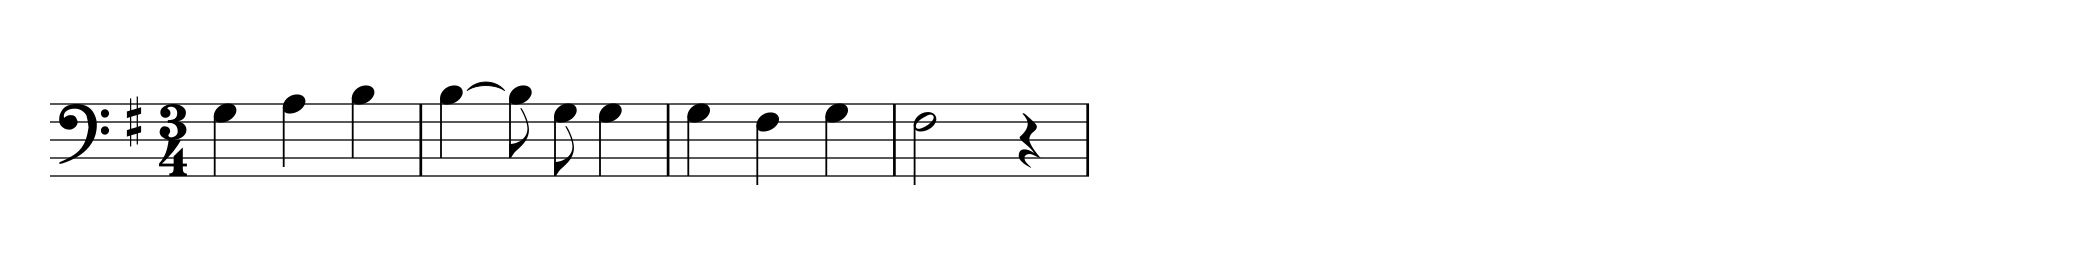

In [95]:
# RUN verovio pred8.json -o pred8.svg --footer none --adjust-page-height IN TERMINAL
# RUN rsvg-convert pred8.svg > pred8.png IN TERMINAL
Image.open('/home/ibukey/primus/pred8.png')

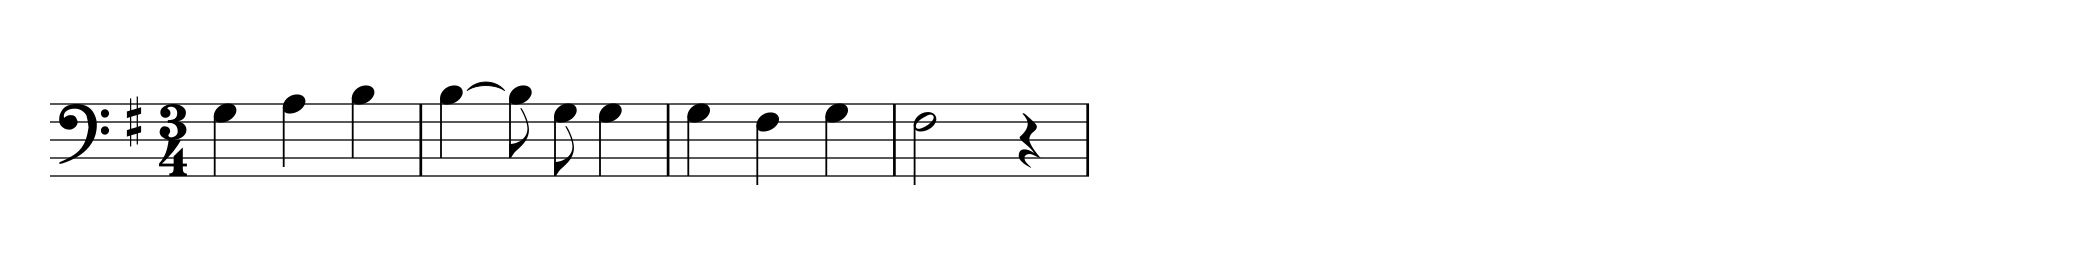

In [104]:
Image.open('/home/ibukey/primus/pred8.png')

In [83]:
import json
for i in range(2):
    with open('/home/ibukey/ttmp/semantic-nonrhythmic-preds/5_4/pred_g2_em_{}.txt'.format(i), 'r') as f:
        text = f.read()
        text = pseudo_semantic_to_semantic(text)
        convert_and_save(text, '/home/ibukey/ttmp/semantic-nonrhythmic-json/pred_g2_em_{}.json'.format(i))


In [84]:
! for i in {0..3}; do verovio /home/ibukey/ttmp/semantic-nonrhythmic-json/pred_g2_em_$i.json -o /home/ibukey/ttmp/semantic-nonrhythmic-svg/pred_g2_em_$i.svg --footer none --adjust-page-height; done


Output written to /home/ibukey/ttmp/semantic-nonrhythmic-svg/pred_g2_em_0.svg.
Output written to /home/ibukey/ttmp/semantic-nonrhythmic-svg/pred_g2_em_1.svg.
The file '/home/ibukey/ttmp/semantic-nonrhythmic-json/pred_g2_em_2.json' could not be opened.
The file '/home/ibukey/ttmp/semantic-nonrhythmic-json/pred_g2_em_3.json' could not be opened.


In [85]:
! for i in {0..1}; do rsvg-convert /home/ibukey/ttmp/semantic-nonrhythmic-svg/pred_g2_em_$i.svg > /home/ibukey/ttmp/semantic-nonrhythmic-png/pred_g2_em_$i.png; done


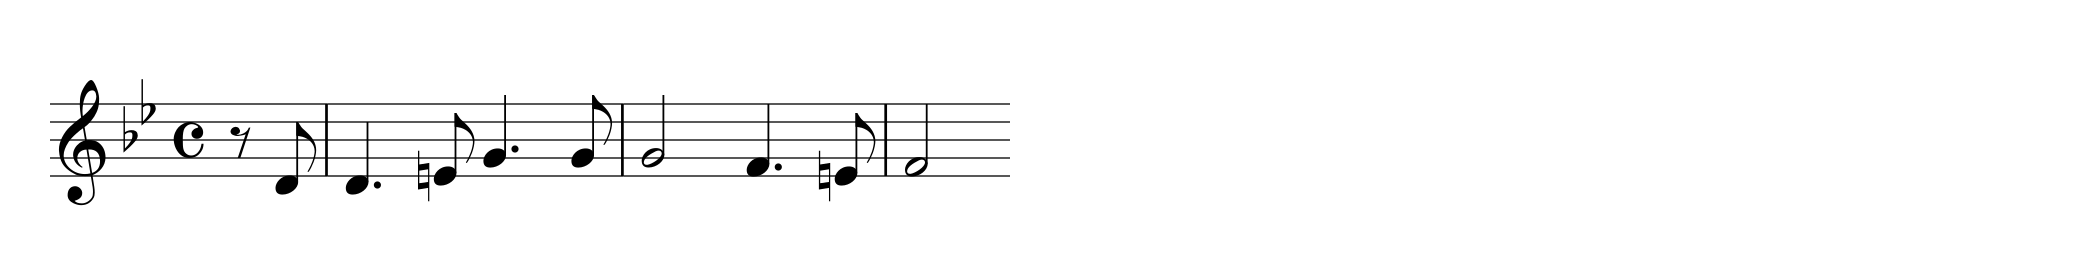

In [66]:
Image.open('/home/ibukey/ttmp/semantic-model-5-png/pred_g2_bbm_1.png')